In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from typing import List
import pandas as pd

# plt.style.use("bmh")
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.grid'] = True

# Con DAQ

In [23]:
df = pd.read_csv("../mediciones/D.D/Medicion laser continua/R = 50/offset 2.csv")

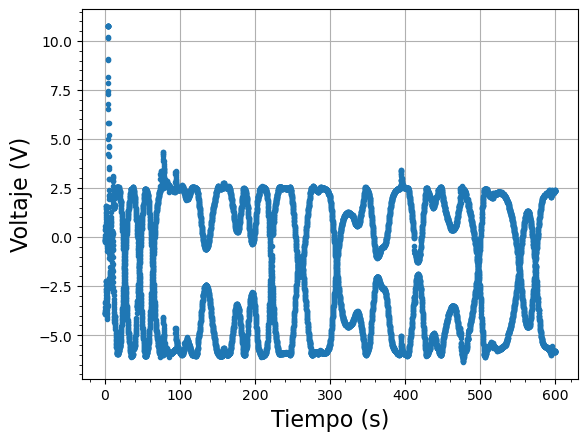

In [24]:
plt.plot(df["T"], df["V"],".")
plt.ylabel("Voltaje (V)")
plt.xlabel("Tiempo (s)")
plt.show()

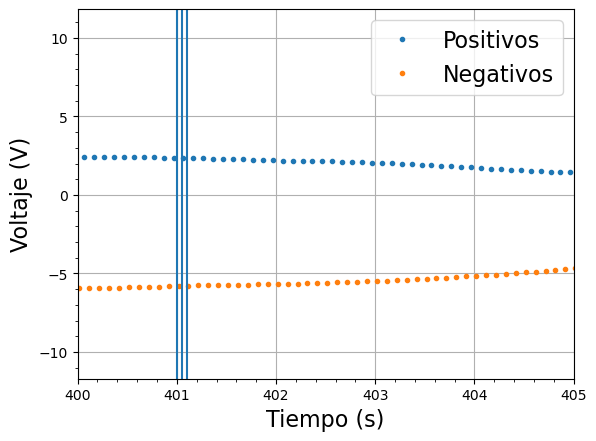

In [22]:
plt.plot(df[df["V"] > 0]["T"],df[df["V"] > 0]["V"],".", label = "Positivos")
plt.plot(df[df["V"] <= 0]["T"],df[df["V"] <= 0]["V"],".",label = "Negativos")
plt.ylabel("Voltaje (V)")
plt.xlabel("Tiempo (s)")
plt.xlim(400,405)
plt.axvline(401)
plt.axvline(401.05)
plt.axvline(401.1)
plt.legend()
plt.show()

# Con osciloscopio

In [20]:
offsets = [1.9999999999999998]
file_pol = "../mediciones/D.D/Medicion laser continua/R = 50/con polarizador 1.9999999999999998 V.pickle"
file_sin = "../mediciones/D.D/Medicion laser continua/R = 50/sin polarizador 1.9999999999999998 V.pickle"

def compilar_mediciones(filename_pol, filename_sin):
            
        with open(filename_pol, "rb") as f:
                dic = pickle.load(f)

        V_2_pol = []
        for i in list(dic.keys())[1:]: # Como la primer key son los parámetros, lo salteo
                V_2_pol += list(dic[i]["V_2"])

        with open(filename_sin, "rb") as f:
                dic = pickle.load(f)

        V_2_sin = []
        for i in list(dic.keys())[1:]: # Como la primer key son los parámetros, lo salteo
                V_2_sin += list(dic[i]["V_2"])

        return V_2_pol, V_2_sin


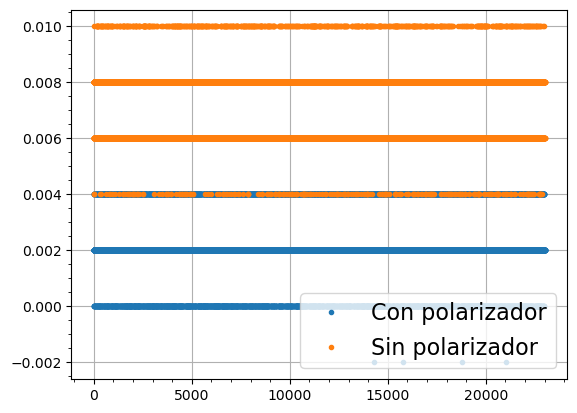

In [23]:
plt.plot(V_2_pol,".",label = "Con polarizador")
plt.plot(V_2_sin, ".", label = "Sin polarizador")
plt.legend()

plt.show()

In [ ]:
std_pol = np.std(V_2_pol[1])
std_pol = np.std(V_2_pol[1])